In [86]:
# Exploratory Analysis

In [87]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
%matplotlib inline

In [107]:
nRowsRead = None # specify 'None' if want to read whole file
#df1 = pd.read_csv()
df1 = pd.read_csv("/Users/priyanshusankhala/Downloads/onehundred.csv", delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'companies_sorted.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 396 rows and 14 columns


In [108]:
#df1 = pd.read_csv('../input/companies_sorted.csv', delimiter=',', nrows = nRowsRead)

In [109]:
df1.dataframeName = 'onehundred.csv'

In [110]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [111]:
df1.head()

,Company Name,Company url,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,"""cecaci"" centro de capacitacion comercial e in...",linkedin.com,1,0.0,0.000,2.0,0.160,45,46,0.0,0.0,0,0.000000,0
1,3m health care,3m.com,1,1.0,0.333,1.0,0.333,21,11,0.0,0.0,1,0.000000,1
2,abb,global.abb,1,2.0,2.000,1.0,1.000,62,8,460.0,1640.0,1,3.565217,1
3,abbott,abbott.com,1,1.0,1.000,2.0,2.000,12,4,120.0,735.0,1,6.125000,1
4,abbvie,abbvie.com,1,1.0,1.000,1.0,0.000,41,4,203.0,1687.0,1,8.310345,1


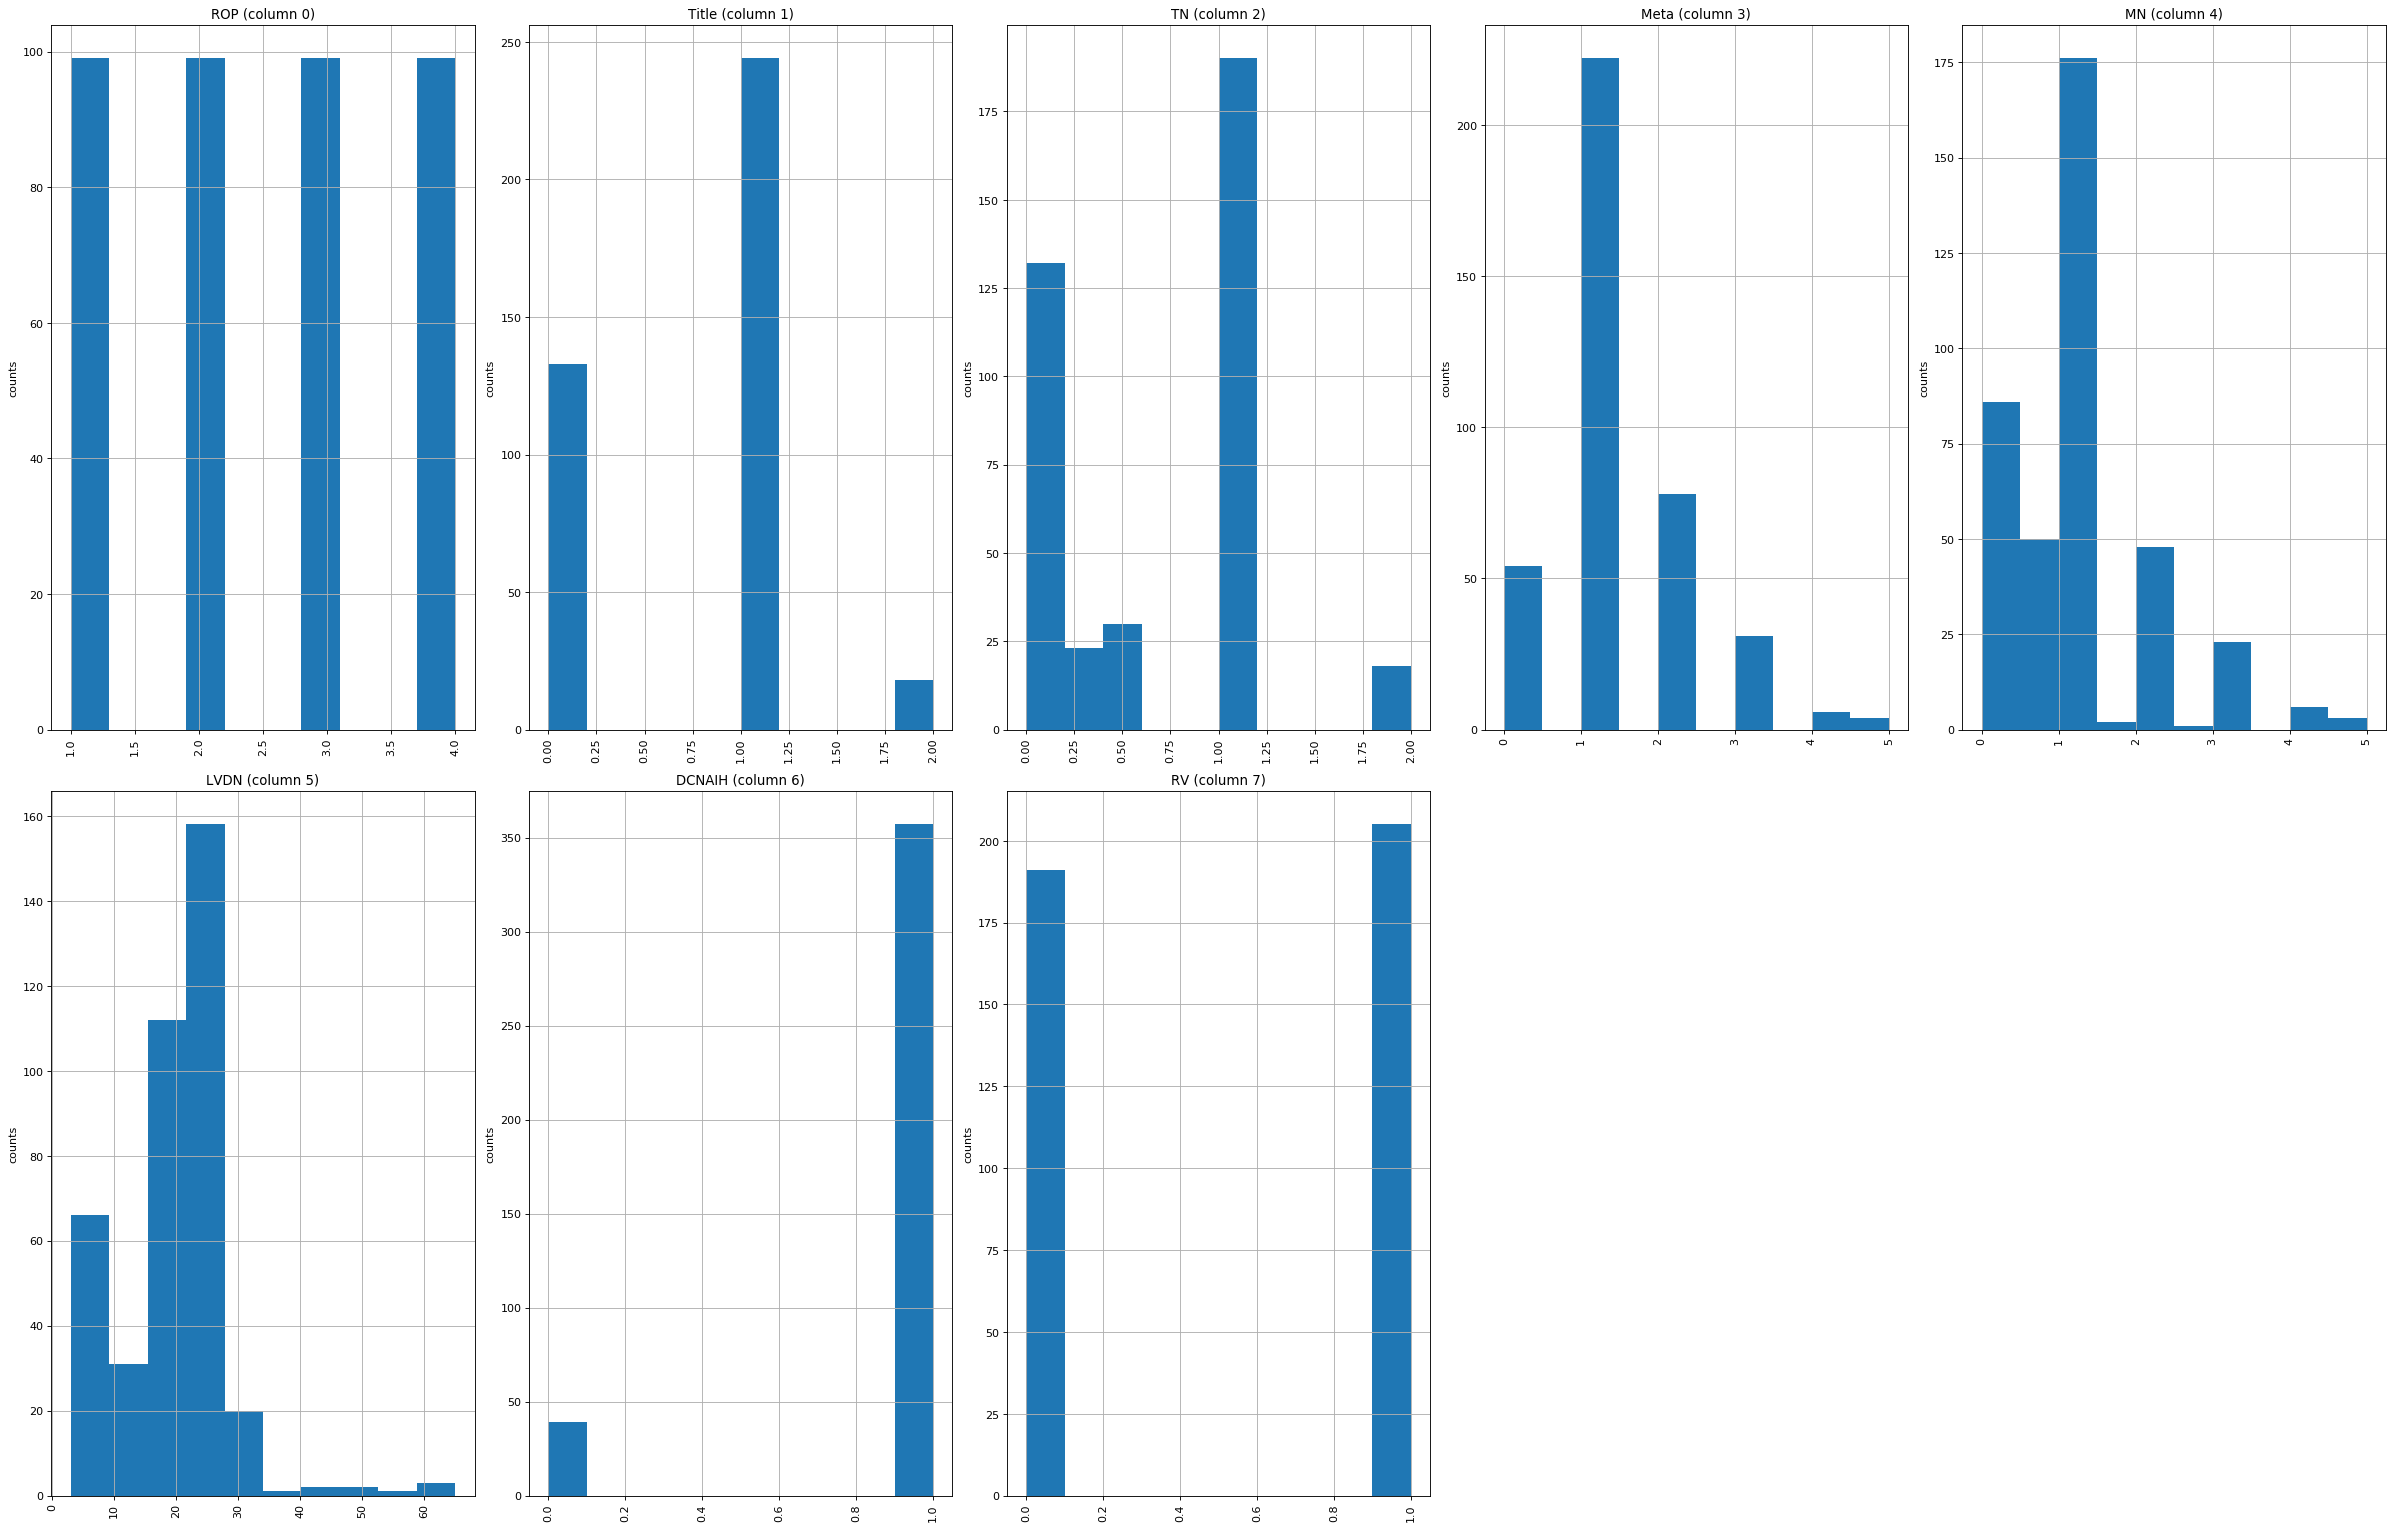

In [112]:
plotPerColumnDistribution(df1, 10, 5)

In [113]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

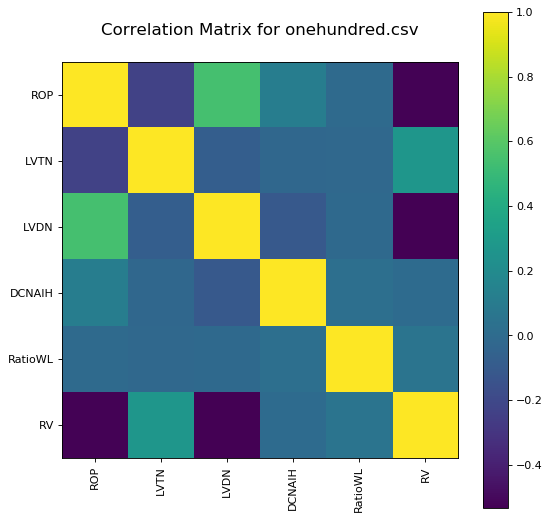

In [114]:
plotCorrelationMatrix(df1, 8)

In [115]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2fb905c0>,
      dtype=object)

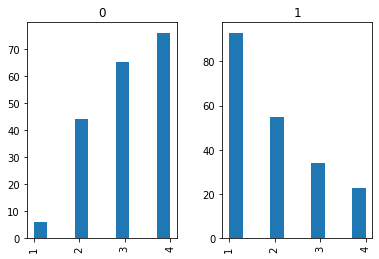

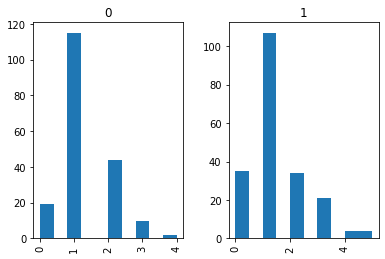

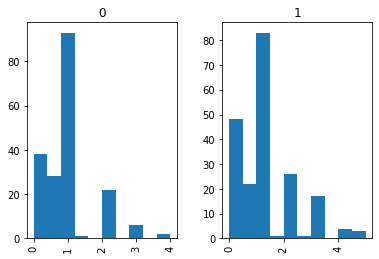

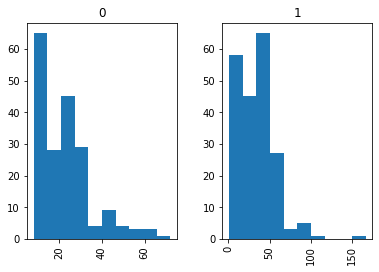

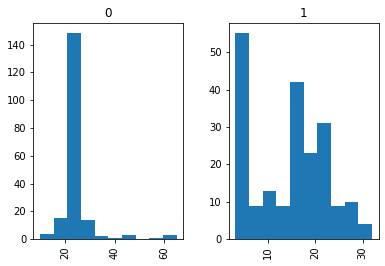

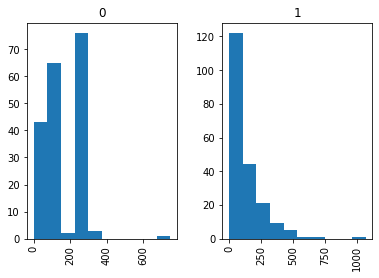

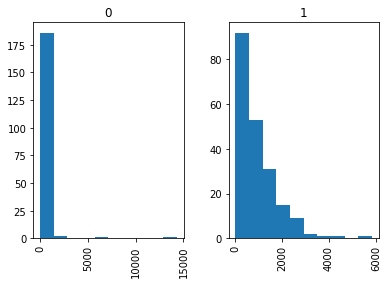

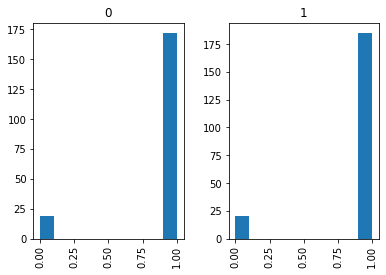

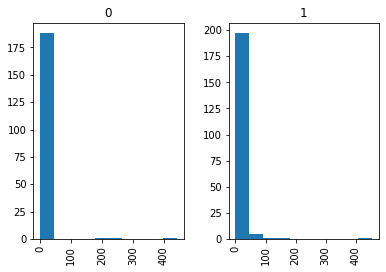

In [117]:
#df1.hist(column='TN', by='RV')
df1.hist(column='ROP', by='RV')
df1.hist(column='Meta', by='RV')
df1.hist(column='MN', by='RV')
df1.hist(column='LVTN', by='RV')
df1.hist(column='LVDN', by='RV')
df1.hist(column='Links', by='RV')
df1.hist(column='Word', by='RV')
df1.hist(column='DCNAIH', by='RV')
df1.hist(column='RatioWL', by='RV')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a2ecf95c0>,
      dtype=object)

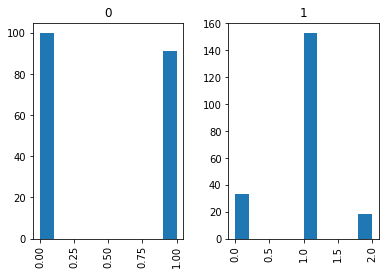

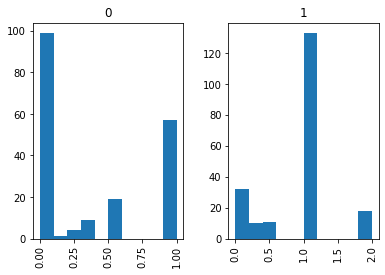

In [118]:
# from matplotlib.pyplot import hist
# df1 = pd.DataFrame({
#     'Title': np.random.randn(100),
#     'RV': 100 * np.random.rand()
# })
# hist(df1.RV, weights=df.Title)
#df1.hist(column='Title', by='RV', bins=35)
df1.hist(column='Title', by='RV')
df1.hist(column='TN', by='RV')
# df1.hist(column='ROP', by='RV')
# df1.hist(column='Meta', by='RV')
# df1.hist(column='MN', by='RV')
# df1.hist(column='LVTN', by='RV')
# df1.hist(column='LVDN', by='RV')
# df1.hist(column='Links', by='RV')
# df1.hist(column='Words', by='RV')
# df1.hist(column='DCNAIH', by='RV')
# df1.hist(column='RatioWL', by='RV')

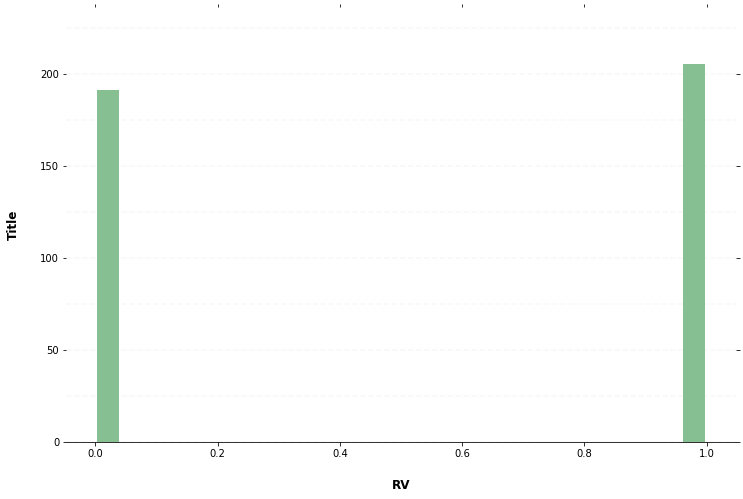

In [97]:
ax = df1.hist(column='RV', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")
    # Set x-axis label
    x.set_xlabel("RV", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Title", labelpad=20, weight='bold', size=12)

    # Format y-axis label
   # x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

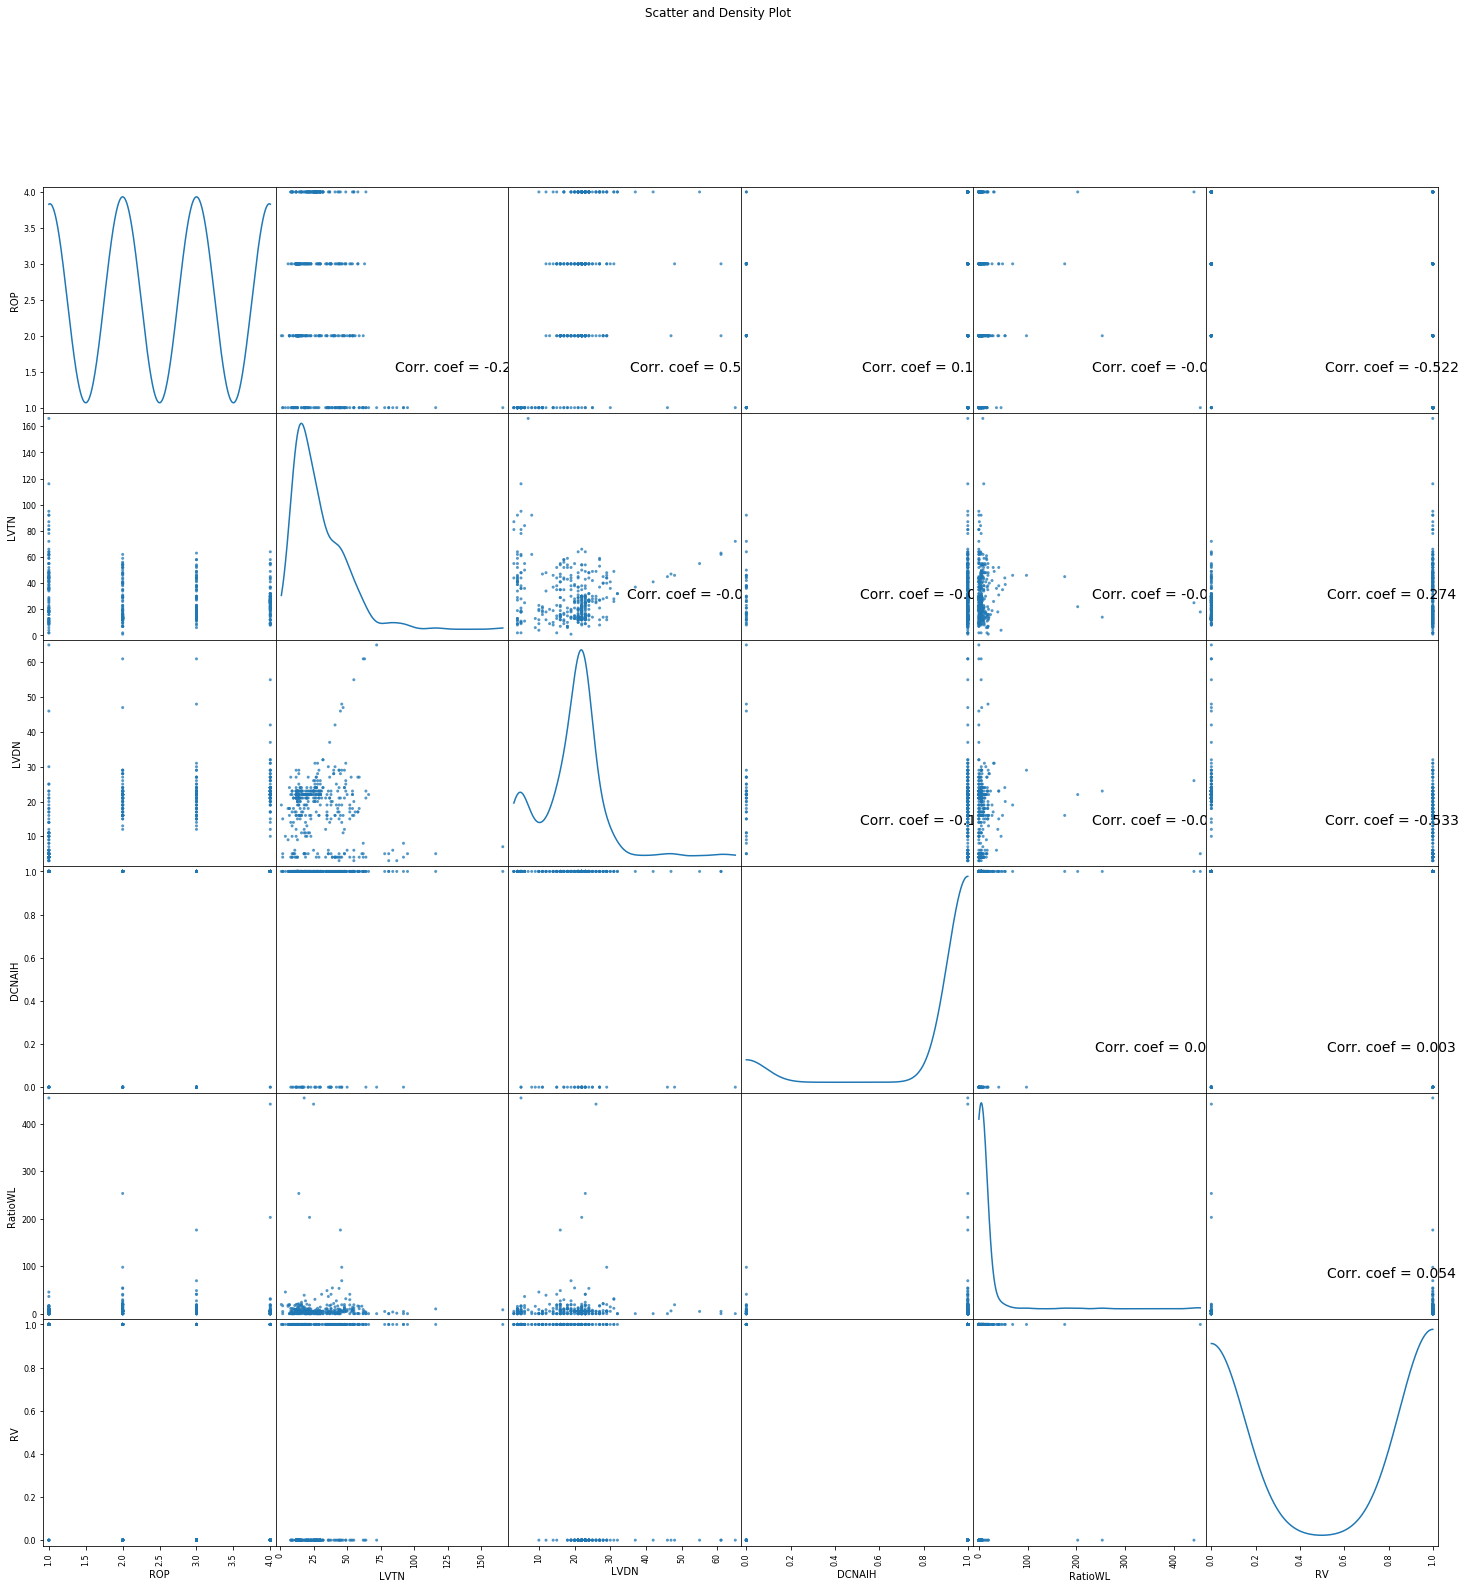

In [30]:
plotScatterMatrix(df1, 25, 14)

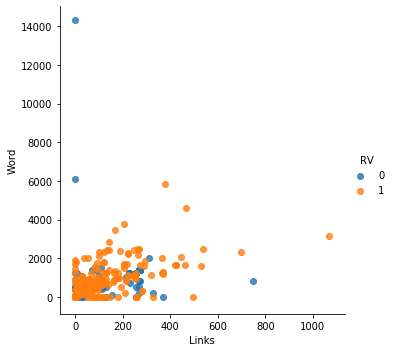

In [33]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='Links', y='Word', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

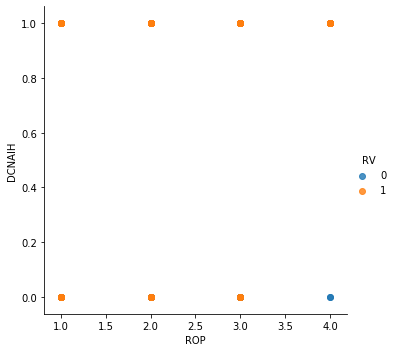

In [34]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='ROP', y='DCNAIH', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

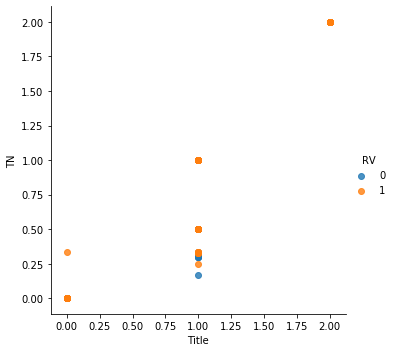

In [37]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='Title', y='TN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

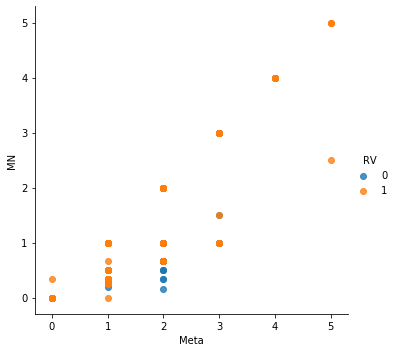

In [36]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='Meta', y='MN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

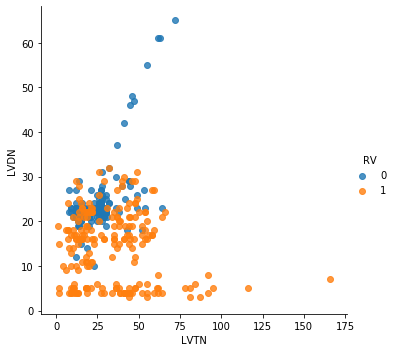

In [38]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='LVTN', y='LVDN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

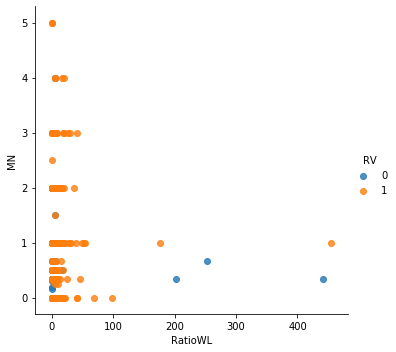

In [39]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='RatioWL', y='MN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

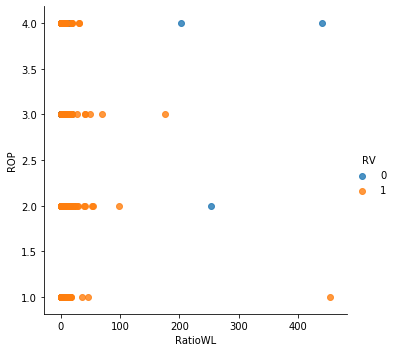

In [40]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='RatioWL', y='ROP', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

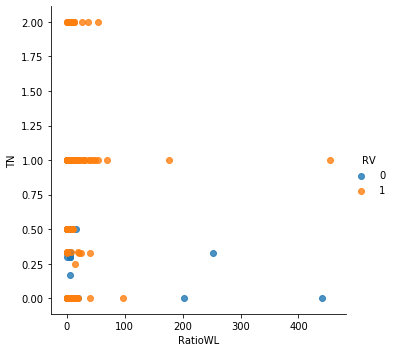

In [41]:
# Multivariate scatter plots¶
footballers = df1.copy()
sns.lmplot(x='RatioWL', y='TN', hue='RV', 
           data=footballers.loc[footballers['RV'].isin(['1', '0', '2'])], 
           fit_reg=False)

In [42]:
# # from pandas.plotting import parallel_coordinates

# # p = (df1[(df1['Response Variable'].isin(["1", "0"]))]
# #          .loc[:, ['Response Variable''Rank of page', 'Appeared in Title', 'Number of words in company name appering in meta tag(4)', 'Levenshtein distance(Domain-Name)7', 'no. of links(8)', 'Word Count(9)']]
# #     )

# # parallel_coordinates(p, 'Response Variable')
# import plotly.express as px
# df1 = px.data.df1
# fig = px.parallel_coordinates(df1, color="Response Variable", labels={"Response Variable": "Response",
#                 "Rank of page": "Rank", "Appeared in Title": "Title",
#                 "Levenshtein distance(Domain-Name)7": "LV DIS", "no. of links(8)": "total links", },
#                              color_continuous_scale=px.colors.diverging.Tealrose,
#                              color_continuous_midpoint=2)
# fig.show()

In [43]:

# sns.heatmap(
#     df1.loc[:, ['Rank of page', 'Appeared in Title', 'Number of words in company name appering in meta tag(4)', 'Levenshtein distance(Domain-Name)7', 'no. of links(8)', 'Word Count(9)', 'Response Variable']].corr(),
#     annot=True
# )

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_venn as venn

from math import pi
from pandas.plotting import parallel_coordinates
# import plotly.graph_objs as go
# import plotly.plotly as py
import chart_studio.plotly as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# importing libraries for plot
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [13]:
# Rename all columns
df2 = df1.rename(columns= {"Rank of page": "ROP",
                     "Appeared in Title":"Title",
                     "Number of words in company name appering in meta tag(4)":"Meta",
                     "Ttile and normalized(3)":"TN",
                     "Number of words in company name appering in meta tag,normalized(5)":"MN",
                     "Levenshtein title and name(6)":"LVTN",
                     "Levenshtein distance(Domain-Name)7":"LVDN",
                     "no. of links(8)":"Links",
                     "Word Count(9)":"Word",
                     "Does Company name apperars in html(10)":"DCNAIH",
                     "Ratio of words in the site content to all links on the page(11)":"RatioLW",
                     "Response Variable":"RV"},
                                 inplace = True)

In [45]:
df1.head()

,Company Name,Company url,ROP,Title,TN,Meta,MN,LVTN,LVDN,Links,Word,DCNAIH,RatioWL,RV
0,"""cecaci"" centro de capacitacion comercial e in...",linkedin.com,1,0.0,0.000,2.0,0.160,45,46,0.0,0.0,0,0.000000,0
1,3m health care,3m.com,1,1.0,0.333,1.0,0.333,21,11,0.0,0.0,1,0.000000,1
2,abb,global.abb,1,2.0,2.000,1.0,1.000,62,8,460.0,1640.0,1,3.565217,1
3,abbott,abbott.com,1,1.0,1.000,2.0,2.000,12,4,120.0,735.0,1,6.125000,1
4,abbvie,abbvie.com,1,1.0,1.000,1.0,0.000,41,4,203.0,1687.0,1,8.310345,1


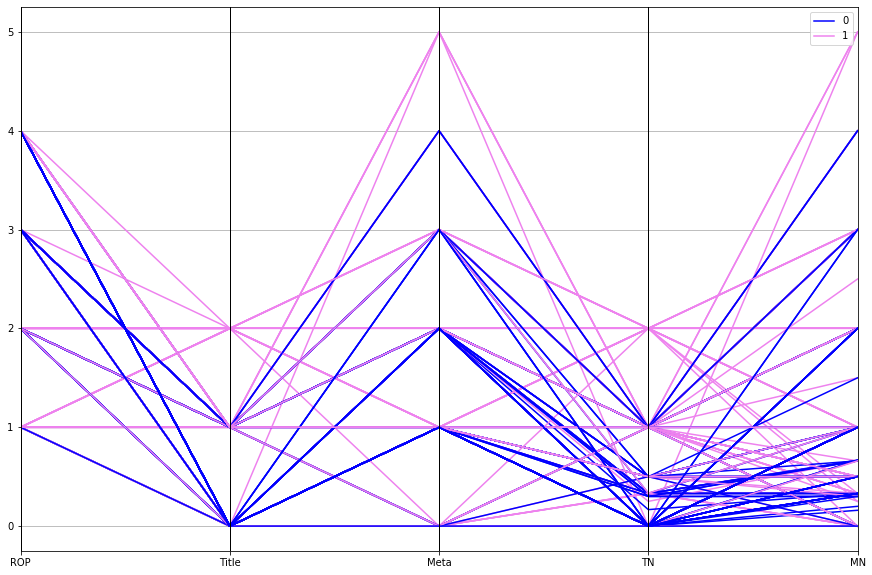

In [59]:
# Parallel Plot
d = df1[['ROP', 'Title', 'Meta','TN','MN','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()


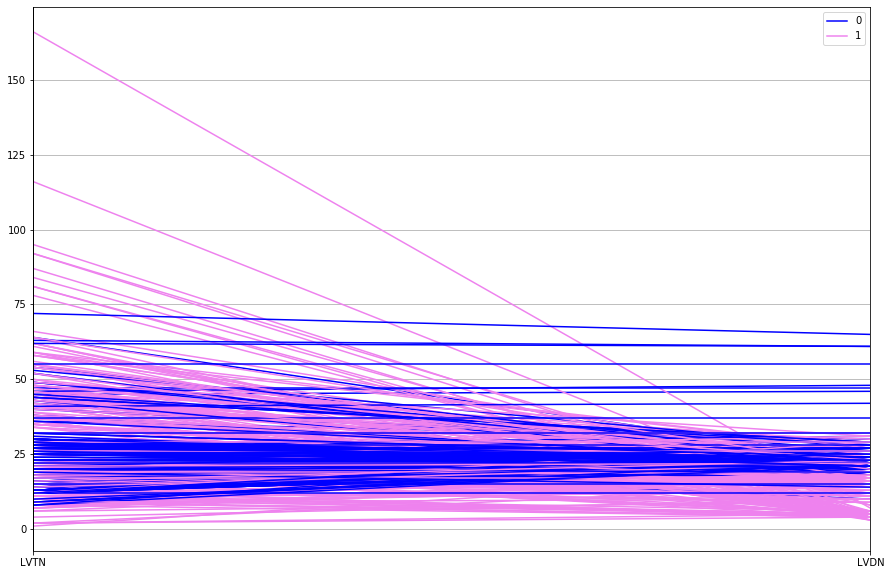

In [53]:
'LVDN','MN','LVTN','DCNAIH','RatioWL',
# Parallel Plot
d = df1[['LVTN','LVDN','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()

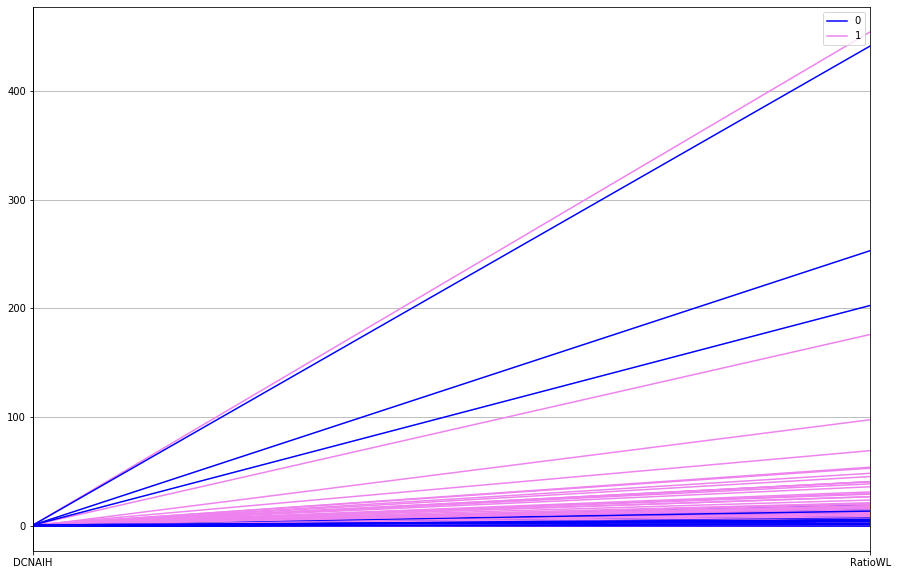

In [61]:
# Parallel Plot
d = df1[['DCNAIH','RatioWL','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()

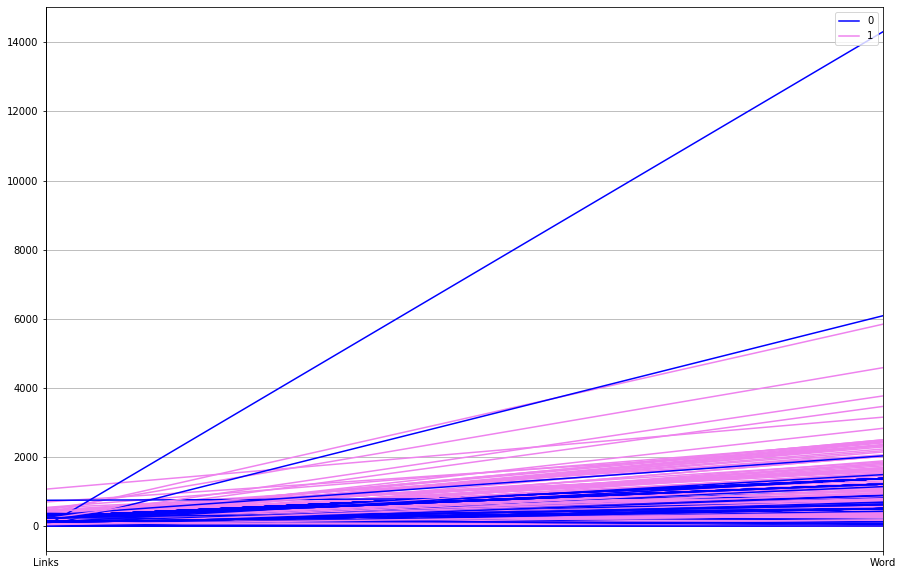

In [56]:
# Parallel Plot
d = df1[['Links','Word','RV']]
plt.figure(figsize=(15, 10))
parallel_coordinates(d, "RV", color =['blue', "violet"])
plt.show()

In [73]:
from bokeh.plotting import figure, show
import pandas as pd

df2 = pd.DataFrame()

p = figure(x_axis_label="Title", y_axis_label="RV", 
           title="html tags")
p.circle("X", "Y", size=15, source=df)

show(p)


In [119]:
# Corelation Matrix
corrMatrix = df1.corr()
print (corrMatrix)

              ROP     Title        TN      Meta        MN      LVTN      LVDN  \
ROP      1.000000 -0.478396 -0.490578 -0.062635 -0.056855 -0.232457  0.545996   
Title   -0.478396  1.000000  0.930608  0.248903  0.235578  0.126023 -0.338287   
TN      -0.490578  0.930608  1.000000  0.225134  0.314643  0.161666 -0.392395   
Meta    -0.062635  0.248903  0.225134  1.000000  0.870285  0.099729 -0.109284   
MN      -0.056855  0.235578  0.314643  0.870285  1.000000  0.085359 -0.198901   
LVTN    -0.232457  0.126023  0.161666  0.099729  0.085359  1.000000 -0.074300   
LVDN     0.545996 -0.338287 -0.392395 -0.109284 -0.198901 -0.074300  1.000000   
Links   -0.130215  0.050133  0.072005  0.000932 -0.000944 -0.003301 -0.145184   
Word    -0.039752  0.022462  0.033768  0.004279  0.014924 -0.039076 -0.051524   
DCNAIH   0.117493  0.430143  0.377745  0.339412  0.302322 -0.022983 -0.107805   
RatioWL -0.000528  0.017953  0.015171 -0.032072 -0.049616 -0.015642 -0.011867   
RV      -0.522076  0.412308 

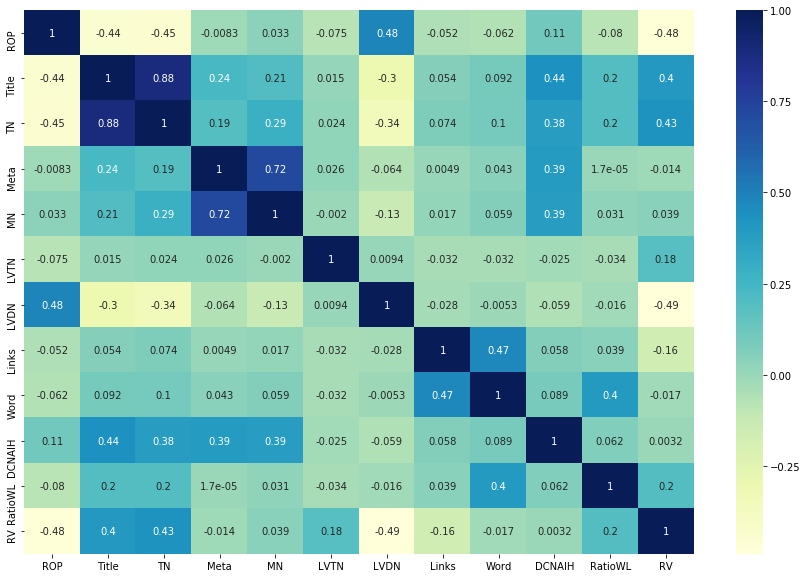

In [129]:
from scipy.stats.stats import kendalltau
corr = df1.corr(method='kendall')
#rcParams['figure.figsize'] = 14.7,8.27
plt.figure(figsize=(15, 10))
sns.heatmap(corr, 
           xticklabels=corr.columns.values, 
           yticklabels=corr.columns.values, 
           cmap="YlGnBu",
          annot=True)

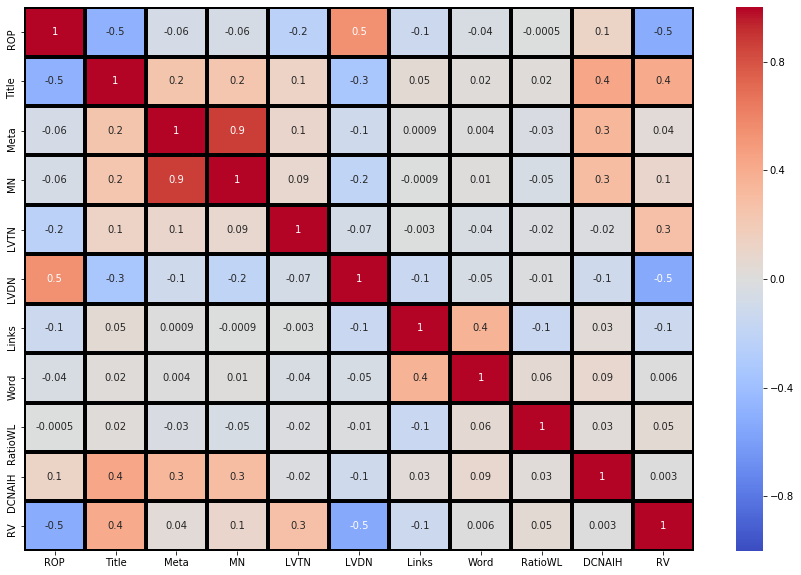

In [132]:
# Co relation Plot
from scipy.stats.stats import kendalltau
plt.figure(figsize=(15, 10))
sns.heatmap(
    df1.loc[:, ['ROP', 'Title', 'Meta', 'MN', 'LVTN', 'LVDN', 'Links', 'Word', 'RatioWL','DCNAIH','RV']].corr(),
    annot=True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black'
)